In [1]:
# 머신러닝
# 1. 데이터 수집 (완료), 크롤링
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic = sns.load_dataset('titanic')
titanic1 = sns.load_dataset('titanic')

2. 탐색적 데이터 분석 (Experimental Data Analysis)

In [3]:
titanic.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [4]:
titanic.shape

(891, 15)

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False


In [8]:
# class, who, adult_male, embark_town, alive, alone 삭제 후 df에 저장
df = titanic.drop(columns=['class', 'who', 'adult_male', 'embark_town', 'alive', 'alone'])
df1 = titanic.drop(columns=['class', 'who', 'adult_male', 'embark_town', 'alive', 'alone'])

In [9]:
df.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.25,S,NaN


In [10]:
df.corr()

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

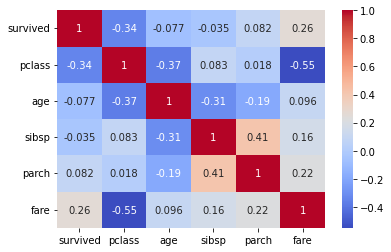

In [11]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [12]:
df.value_counts('pclass')

pclass
3    491
1    216
2    184
dtype: int64

C:\Users\yng12\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pclass', ylabel='count'>

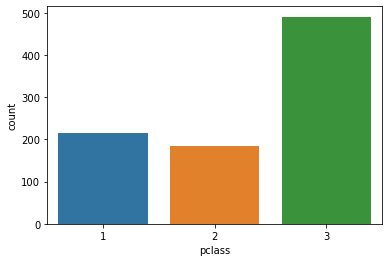

In [13]:
sns.countplot('pclass', data=df)

In [14]:
pd.crosstab(df.pclass, df.survived, margins=True)

survived,0,1,All
pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


C:\Users\yng12\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pclass', ylabel='count'>

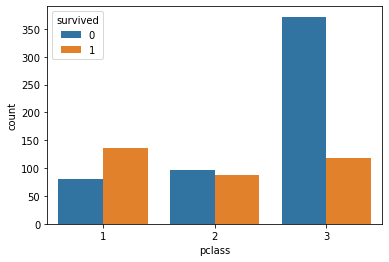

In [15]:
sns.countplot('pclass', hue='survived', data=df)

C:\Users\yng12\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

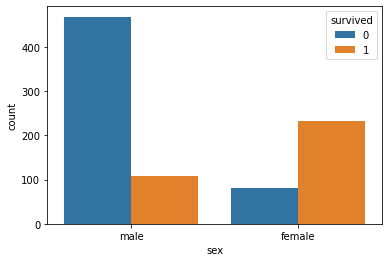

In [16]:
sns.countplot('sex', hue='survived', data=df)

C:\Users\yng12\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pclass', ylabel='age'>

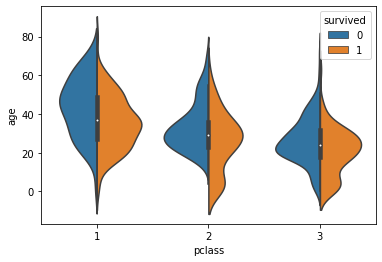

In [17]:
sns.violinplot('pclass', 'age', hue='survived', data=df, split=True)

In [18]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,NaN
887,1,1,female,19.0,0,0,30.0000,S,B
888,0,3,female,NaN,1,2,23.4500,S,NaN
889,1,1,male,26.0,0,0,30.0000,C,C




'''
전처리
```



In [19]:
#1. 결측치 제거
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  891 non-null    int64   
 1   pclass    891 non-null    int64   
 2   sex       891 non-null    object  
 3   age       714 non-null    float64 
 4   sibsp     891 non-null    int64   
 5   parch     891 non-null    int64   
 6   fare      891 non-null    float64 
 7   embarked  889 non-null    object  
 8   deck      203 non-null    category
dtypes: category(1), float64(2), int64(4), object(2)
memory usage: 57.0+ KB


In [20]:
df.isna().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
deck        688
dtype: int64

In [21]:
df.isna().sum().sum()

867

In [22]:
df.embarked.value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: embarked, dtype: int64

In [23]:
#1. S항으로 대체 --> df1
#2. N항으로 대체 --> df2

In [24]:
df['embarked'].fillna('S', inplace=True)
df1['embarked'].fillna('N', inplace=True)

In [25]:
df.embarked.value_counts(dropna=False)

S    646
C    168
Q     77
Name: embarked, dtype: int64

In [26]:
df1.embarked.value_counts(dropna=False)

S    644
C    168
Q     77
N      2
Name: embarked, dtype: int64

In [27]:
df.isna().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      0
deck        688
dtype: int64

In [28]:
df1.isna().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      0
deck        688
dtype: int64

<AxesSubplot:>

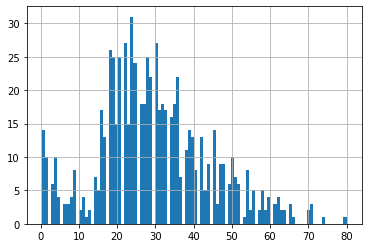

In [29]:
# 결측치 제거 (age)
df.age.hist(bins=100)

In [30]:
df1.age.fillna(df1.age.median(), inplace=True)

In [31]:
df1.isna().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
deck        688
dtype: int64

<AxesSubplot:>

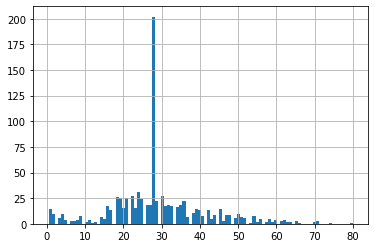

In [32]:
df1.age.hist(bins=100)

In [33]:
# 1등석, 남성의 중앙 나이 --> 해당 조건의 결측치에 채워넣기
# 1등석, 여성의 중앙 나이
# 2등석, 남성의 중앙 나이
# 2등석, 여성의 중앙 나이
# 3등석, 남성의 중앙 나이
# 3등석, 여성의 중앙 나이
result = pd.pivot_table(df, index=df.pclass, columns=df.sex, aggfunc='median')

In [34]:
result['age'].loc[1, ['male']]

sex
male    40.0
Name: 1, dtype: float64

In [35]:
male_1_med = df[(df.pclass == 1) & (df.sex == 'male')].age.median()
female_1_med = df[(df.pclass == 1) & (df.sex == 'female')].age.median()
male_2_med = df[(df.pclass == 2) & (df.sex == 'male')].age.median()
female_2_med = df[(df.pclass == 2) & (df.sex == 'female')].age.median()
male_3_med = df[(df.pclass == 3) & (df.sex == 'male')].age.median()
female_3_med = df[(df.pclass == 3) & (df.sex == 'female')].age.median()

df.loc[(df.pclass == 1) & (df.sex == 'male') & (df.age.isnull()), 'age'] = male_1_med
df.loc[(df.pclass == 1) & (df.sex == 'female') & (df.age.isnull()), 'age'] = female_1_med
df.loc[(df.pclass == 2) & (df.sex == 'male') & (df.age.isnull()), 'age'] = male_2_med
df.loc[(df.pclass == 2) & (df.sex == 'female') & (df.age.isnull()), 'age'] = female_2_med
df.loc[(df.pclass == 3) & (df.sex == 'male') & (df.age.isnull()), 'age'] = male_3_med
df.loc[(df.pclass == 3) & (df.sex == 'female') & (df.age.isnull()), 'age'] = female_3_med

In [36]:
df.isna().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
deck        688
dtype: int64

In [37]:
df1.isna().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
deck        688
dtype: int64

<AxesSubplot:>

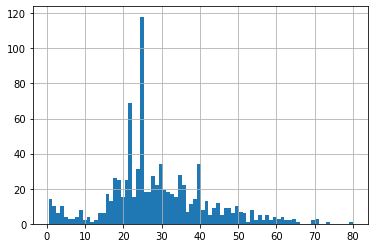

In [38]:
df.age.hist(bins=80)

<AxesSubplot:>

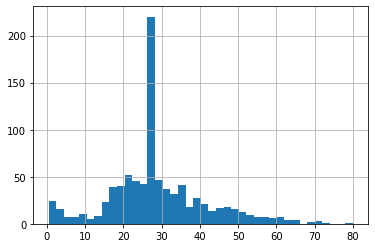

In [39]:
df1.age.hist(bins=40)

In [40]:
df.deck.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

In [41]:
688/891

0.7721661054994389

C:\Users\yng12\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='deck', ylabel='count'>

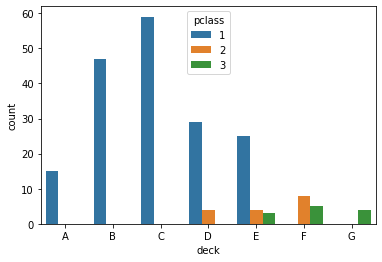

In [42]:
sns.countplot('deck', hue='pclass', data=df)

In [43]:
df.drop(columns='deck', inplace=True)

In [44]:
df1.deck = df1.deck.astype('object').fillna('N')

In [45]:
df1.isna().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
deck        0
dtype: int64

In [46]:
df.isna().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [47]:
# 결측치 제거(완료)
# 2번째 전처리 (인코딩)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       891 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [49]:
df.sex.unique()

array(['male', 'female'], dtype=object)

In [50]:
df.embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [51]:
# Label encoding
from sklearn.preprocessing import LabelEncoder

In [52]:
encoder = LabelEncoder()
encoder.fit(df.sex)
labels=encoder.transform(df.sex)
print(labels)

[1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 1 1 1
 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1
 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0
 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0
 1 0 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0 0
 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1
 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1
 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0
 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1
 1 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0
 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1
 1 1 0 1 0 0 1 1 1 1 1 1 

In [53]:
encoder.classes_

array(['female', 'male'], dtype=object)

In [54]:
encoder.inverse_transform([1])

array(['male'], dtype=object)

In [55]:
# encoding 2가지 방법 (label encoding, )

test = ['A', 'B', 'C', 'D', 'F']
encoder = LabelEncoder()
encoder.fit(test)
labels=encoder.transform(test)
print(labels)

[0 1 2 3 4]


In [56]:
# 0 ~ 9999
# 회귀 분석에서 숫자의 크기에 따른 결과값에 대한 영향을 없애기 위해
# one hot encoding
pd.get_dummies(test)

,A,B,C,D,F
0,1,0,0,0,0
1,0,1,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,0,1


In [57]:
# feature scaling
# 표준화, 정규화
def standard(x):
  return (x - x.mean()) / x.std()

def normalization(x):
  return (x - x.min()) / (x.max() - x.min())

In [58]:
# Label encoding
from sklearn.preprocessing import LabelEncoder

# df, df1 모두 레이블 인코딩
for i in ['sex', 'embarked']: #'deck'
  encoder = LabelEncoder()
  encoder.fit(df[i])
  df[i]=encoder.transform(df[i])

In [59]:
for i in ['sex', 'embarked', 'deck']:
  encoder = LabelEncoder()
  encoder.fit(df1[i])
  df1[i]=encoder.transform(df1[i])

In [60]:
# df, df1 모두 정규화, 표준화 결과 확인
df.apply(lambda x : standard(x)).describe()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
count,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02
mean,1.903951e-16,1.679664e-16,-1.687140e-16,2.664660e-16,1.528893e-16,-3.638441e-17,7.437622e-16,8.061889e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-7.888293e-01,-1.565228e+00,-1.354813e+00,-2.156608e+00,-4.742788e-01,-4.734077e-01,-6.480577e-01,-1.941213e+00
25%,-7.888293e-01,-3.691575e-01,-1.354813e+00,-5.721724e-01,-4.742788e-01,-4.734077e-01,-4.888737e-01,-6.777939e-01
50%,-7.888293e-01,8.269128e-01,7.372810e-01,-2.339390e-01,-4.742788e-01,-4.734077e-01,-3.571902e-01,5.856252e-01
75%,1.266279e+00,8.269128e-01,7.372810e-01,5.176906e-01,4.325504e-01,-4.734077e-01,-2.423274e-02,5.856252e-01
max,1.266279e+00,8.269128e-01,7.372810e-01,3.824861e+00,6.780355e+00,6.970233e+00,9.661740e+00,5.856252e-01


In [61]:
df.apply(lambda x : normalization(x)).describe()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,0.654321,0.647587,0.360548,0.065376,0.063599,0.062858,0.768238
std,0.486592,0.418036,0.477990,0.167183,0.137843,0.134343,0.096995,0.395752
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.264891,0.000000,0.000000,0.015440,0.500000
50%,0.000000,1.000000,1.000000,0.321438,0.000000,0.000000,0.028213,1.000000
75%,1.000000,1.000000,1.000000,0.447097,0.125000,0.000000,0.060508,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [62]:
df1

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,1,22.0,1,0,7.2500,3,7
1,1,1,0,38.0,1,0,71.2833,0,2
2,1,3,0,26.0,0,0,7.9250,3,7
3,1,1,0,35.0,1,0,53.1000,3,2
4,0,3,1,35.0,0,0,8.0500,3,7
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,3,7
887,1,1,0,19.0,0,0,30.0000,3,1
888,0,3,0,28.0,1,2,23.4500,3,7
889,1,1,1,26.0,0,0,30.0000,0,2


In [63]:
# data read
# 확인
# EDA
# 결측치제거, 레이블인코딩, 피처스케일링

<AxesSubplot:>

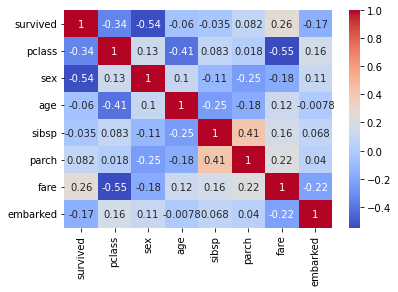

In [64]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

<AxesSubplot:>

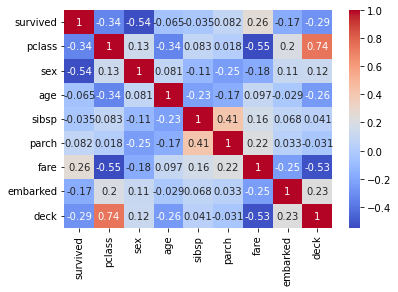

In [65]:
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')

In [66]:
# 문제 데이터: 정답 데이터
y_df = df['survived']
x_df = df.drop(columns='survived')

In [67]:
y_df1 = df1['survived']
x_df1 = df1.drop(columns='survived')

In [68]:
x_df.head(1)

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,1,22.0,1,0,7.25,2


In [69]:
y_df.head(1)

0    0
Name: survived, dtype: int64

In [70]:
89 * 2

178

In [71]:
891 - 178

713

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, random_state=12)

In [74]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_df1, y_df1, test_size=0.2, random_state=12)

In [75]:
x_train

,pclass,sex,age,sibsp,parch,fare,embarked
8,3,0,27.0,0,2,11.1333,2
150,2,1,51.0,0,0,12.5250,2
221,2,1,27.0,0,0,13.0000,2
365,3,1,30.0,0,0,7.2500,2
324,3,1,25.0,8,2,69.5500,2
...,...,...,...,...,...,...,...
241,3,0,21.5,1,0,15.5000,1
253,3,1,30.0,1,0,16.1000,2
390,1,1,36.0,1,2,120.0000,2
667,3,1,25.0,0,0,7.7750,2


In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [77]:
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier(n_jobs=1)
lr_clf = LogisticRegression(n_jobs=1)
dt_clf1 = DecisionTreeClassifier()
rf_clf1 = RandomForestClassifier(n_jobs=1)
lr_clf1 = LogisticRegression(n_jobs=1)

In [78]:
dt_clf.fit(x_train, y_train)
rf_clf.fit(x_train, y_train)
lr_clf.fit(x_train, y_train)
dt_clf1.fit(x_train1, y_train1)
rf_clf1.fit(x_train1, y_train1)
lr_clf1.fit(x_train1, y_train1)

C:\Users\yng12\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yng12\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LogisticRegression(n_jobs=1)

In [79]:
dt_pred = dt_clf.predict(x_test)
rf_pred = rf_clf.predict(x_test)
lr_pred = lr_clf.predict(x_test)
dt1_pred = dt_clf1.predict(x_test1)
rf1_pred = rf_clf1.predict(x_test1)
lr1_pred = lr_clf1.predict(x_test1)

In [80]:
from sklearn.metrics import accuracy_score

In [81]:
print('------------전처리 열심히 -----------------------')
print('decision tree 정확도: %.4f' % accuracy_score(y_test, dt_pred))
print('random forest 정확도: %.4f' % accuracy_score(y_test, rf_pred))
print('logistic regression 정확도: %.4f' % accuracy_score(y_test, lr_pred))
print('------------전처리 간단히 -----------------------')
print('decision tree1 정확도: %.4f' % accuracy_score(y_test1, dt1_pred))
print('random forest1 정확도: %.4f' % accuracy_score(y_test1, rf1_pred))
print('logistic regression1 정확도: %.4f' % accuracy_score(y_test1, lr1_pred))

------------전처리 열심히 -----------------------
decision tree 정확도: 0.7765
random forest 정확도: 0.7598
logistic regression 정확도: 0.8101
------------전처리 간단히 -----------------------
decision tree1 정확도: 0.7542
random forest1 정확도: 0.7933
logistic regression1 정확도: 0.7877


In [82]:
# 교차검증 (99:1)
# 1~800 학습, 801~1000 시험 (198개는 0, 2개는 1) 
# 1~600 학습, 801~1000 학습, 601~800 시험 (200개 모두 0) (198개는 0, 2개는 1)
# ... 401 ~ 600 시험 (200개 모두 0) (198개는 0, 2개는 1)
# ... 201 ~ 400 시험 (200개 모두 0) (198개는 0, 2개는 1)
# ... 1 ~ 200 시험 (200개 모두 0) (198개는 0, 2개는 1)

In [83]:
from sklearn.model_selection import KFold
import numpy as np


In [84]:
def exec_kfold(clf, folds=5):
  kfold = KFold(n_splits=folds)
  scores = []
  for iter_count, (train_index, test_index) in enumerate(kfold.split(x_df)):
    x_train, x_test = x_df.values[train_index], x_df.values[test_index]
    y_train, y_test = y_df.values[train_index], y_df.values[test_index]
    clf.fit(x_train, y_train)
    predictions = clf.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    scores.append(accuracy)
    print('교차검증 {0} 정확도: {1:.4f}'.format(iter_count, accuracy))

  mean_score = np.mean(scores)
  print('평균 정확도: {0:.4f}'.format(mean_score))

In [85]:
exec_kfold(dt_clf)

교차검증 0 정확도: 0.7709
교차검증 1 정확도: 0.7753
교차검증 2 정확도: 0.8371
교차검증 3 정확도: 0.7416
교차검증 4 정확도: 0.7697
평균 정확도: 0.7789


In [86]:
exec_kfold(rf_clf)

교차검증 0 정확도: 0.7598
교차검증 1 정확도: 0.8034
교차검증 2 정확도: 0.8539
교차검증 3 정확도: 0.7640
교차검증 4 정확도: 0.8034
평균 정확도: 0.7969


In [87]:
exec_kfold(lr_clf)

교차검증 0 정확도: 0.7877
교차검증 1 정확도: 0.8034
교차검증 2 정확도: 0.8034
교차검증 3 정확도: 0.7640
교차검증 4 정확도: 0.8315
평균 정확도: 0.7980


C:\Users\yng12\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yng12\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [88]:
#990개: 0
#10개: 1

0

0

In [89]:
from sklearn.model_selection import cross_val_score

In [90]:
for i in [dt_clf, rf_clf, lr_clf]:
  scores = cross_val_score(i, x_df, y_df, cv=5)
  print('***************************************')
  print('{0} 교차검증 정확도: {1}'.format(i, scores))
  print('{0} 평균 정확도: {1:.4f}'.format(i, np.mean(scores)))

***************************************
DecisionTreeClassifier() 교차검증 정확도: [0.74301676 0.78651685 0.81460674 0.75280899 0.78651685]
DecisionTreeClassifier() 평균 정확도: 0.7767
***************************************
RandomForestClassifier(n_jobs=1) 교차검증 정확도: [0.77653631 0.80337079 0.87078652 0.78651685 0.83146067]
RandomForestClassifier(n_jobs=1) 평균 정확도: 0.8137
***************************************
LogisticRegression(n_jobs=1) 교차검증 정확도: [0.77653631 0.81460674 0.80898876 0.78651685 0.8258427 ]
LogisticRegression(n_jobs=1) 평균 정확도: 0.8025


C:\Users\yng12\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yng12\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [91]:
from sklearn.model_selection import StratifiedKFold


In [92]:
skf = StratifiedKFold(n_splits=5)
num = 0

In [93]:
for train_index, test_index in skf.split(x_df, y_df):
  num += 1
  label_train = y_df.iloc[train_index]
  label_test = y_df.iloc[test_index]
  print('## 교차검증: {0}'.format(num))
  print('학습레이블 데이터 분포: \n', label_train.value_counts())
  print('검증레이블 데이터 분포: \n', label_test.value_counts())

## 교차검증: 1
학습레이블 데이터 분포: 
 0    439
1    273
Name: survived, dtype: int64
검증레이블 데이터 분포: 
 0    110
1     69
Name: survived, dtype: int64
## 교차검증: 2
학습레이블 데이터 분포: 
 0    439
1    274
Name: survived, dtype: int64
검증레이블 데이터 분포: 
 0    110
1     68
Name: survived, dtype: int64
## 교차검증: 3
학습레이블 데이터 분포: 
 0    439
1    274
Name: survived, dtype: int64
검증레이블 데이터 분포: 
 0    110
1     68
Name: survived, dtype: int64
## 교차검증: 4
학습레이블 데이터 분포: 
 0    439
1    274
Name: survived, dtype: int64
검증레이블 데이터 분포: 
 0    110
1     68
Name: survived, dtype: int64
## 교차검증: 5
학습레이블 데이터 분포: 
 0    440
1    273
Name: survived, dtype: int64
검증레이블 데이터 분포: 
 0    109
1     69
Name: survived, dtype: int64


In [94]:
68/178

0.38202247191011235

In [95]:
def exec_kfold_shuffle(clf, folds=5):
  kfold = KFold(n_splits=folds, shuffle=True)
  scores = []
  for iter_count, (train_index, test_index) in enumerate(kfold.split(x_df)):
    x_train, x_test = x_df.values[train_index], x_df.values[test_index]
    y_train, y_test = y_df.values[train_index], y_df.values[test_index]
    clf.fit(x_train, y_train)
    predictions = clf.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    scores.append(accuracy)
    print('교차검증 {0} 정확도: {1:.4f}'.format(iter_count, accuracy))

  mean_score = np.mean(scores)
  print('평균 정확도: {0:.4f}'.format(mean_score))

In [96]:
exec_kfold_shuffle(dt_clf, 50)

교차검증 0 정확도: 0.8889
교차검증 1 정확도: 0.8333
교차검증 2 정확도: 0.8333
교차검증 3 정확도: 0.7778
교차검증 4 정확도: 0.7222
교차검증 5 정확도: 0.8333
교차검증 6 정확도: 0.7778
교차검증 7 정확도: 0.7778
교차검증 8 정확도: 0.8333
교차검증 9 정확도: 0.8333
교차검증 10 정확도: 0.7778
교차검증 11 정확도: 0.9444
교차검증 12 정확도: 0.7778
교차검증 13 정확도: 0.7778
교차검증 14 정확도: 0.7222
교차검증 15 정확도: 0.8333
교차검증 16 정확도: 0.7778
교차검증 17 정확도: 0.6667
교차검증 18 정확도: 0.9444
교차검증 19 정확도: 0.7222
교차검증 20 정확도: 0.7222
교차검증 21 정확도: 0.7222
교차검증 22 정확도: 0.8889
교차검증 23 정확도: 0.8889
교차검증 24 정확도: 0.6667
교차검증 25 정확도: 0.8889
교차검증 26 정확도: 0.6667
교차검증 27 정확도: 0.7778
교차검증 28 정확도: 0.7778
교차검증 29 정확도: 0.6111
교차검증 30 정확도: 0.8333
교차검증 31 정확도: 0.7778
교차검증 32 정확도: 0.7222
교차검증 33 정확도: 0.7778
교차검증 34 정확도: 0.8333
교차검증 35 정확도: 0.6667
교차검증 36 정확도: 0.8333
교차검증 37 정확도: 0.7778
교차검증 38 정확도: 1.0000
교차검증 39 정확도: 0.6111
교차검증 40 정확도: 0.7222
교차검증 41 정확도: 0.7059
교차검증 42 정확도: 0.8235
교차검증 43 정확도: 0.6471
교차검증 44 정확도: 0.6471
교차검증 45 정확도: 0.7647
교차검증 46 정확도: 0.8235
교차검증 47 정확도: 0.8235
교차검증 48 정확도: 0.8235
교차검증 49 정확도: 0.8235
평균 정확도: 0.

In [97]:
dt_clf = DecisionTreeClassifier(max_depth=3, 
                                min_samples_split=3, 
                                min_samples_leaf=2, 
                                )
scores = cross_val_score(dt_clf, x_df, y_df, cv=5)
np.mean(scores)

0.8069487163392128

In [98]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[None,1,2,3,4,5,6,7,8,9,10],
              'min_samples_split':[2,3,4,5,6,7,8,9,10],
              'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10]}

In [99]:
grid_dtclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dtclf.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=3, min_samples_leaf=2,
                                              min_samples_split=3),
             param_grid={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [100]:
grid_dtclf.best_params_

{'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 4}

In [101]:
grid_dtclf.best_score_

0.8385107849896581

In [102]:
best_dtclf = grid_dtclf.best_estimator_

In [103]:
best_predictions = best_dtclf.predict(x_test)

In [104]:
accuracy_score(y_test, best_predictions)

0.776536312849162

In [105]:
DecisionTreeClassifier()

DecisionTreeClassifier()

In [106]:
grid_dtclf.best_params_

{'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 4}

In [107]:
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.1)

In [108]:
x_train.shape

(801, 7)

In [109]:
x_test.shape

(90, 7)

In [110]:
dt_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [111]:
rf_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [112]:
lr_clf.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

C:\Users\yng12\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

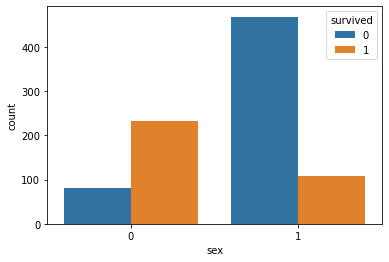

In [113]:
# 평가 지표는 정확도
sns.countplot('sex', hue='survived', data=df)

In [114]:
1 - accuracy_score(y_test, x_test.sex)

0.7777777777777778

In [115]:
from sklearn.metrics import confusion_matrix

In [117]:
confusion_matrix(y_test, best_predictions)

ValueError: Found input variables with inconsistent numbers of samples: [90, 179]

In [121]:
pd.DataFrame(confusion_matrix(y_test, best_predictions))

ValueError: Found input variables with inconsistent numbers of samples: [90, 179]

In [ ]:
# 52: 0 (사망) 이라고 예측, 정답이 0 (사망) 인 경우, True Negative TN
# 26: 1 (생존) 이라고 예측, 정답이 1 (생존) 인 경우, True Positive TP
#  5: 1 (생존) 이라고 예측, 정답이 0 (사망) 인 경우, False Positive FP
#  7: 0 (사망) 이라고 예측, 정답이 1 (생존) 인 경우, False Negative FN

In [ ]:
#1 52: 0 (정상) 이라고 예측, 정답이 0 (정상) 인 경우, True Negative TN
#2 26: 1 (암) 이라고 예측, 정답이 1 (암) 인 경우, True Positive TP
#3  5: 1 (암) 이라고 예측, 정답이 0 (정상) 인 경우, False Positive FP
#4  7: 0 (정상) 이라고 예측, 정답이 1 (암) 인 경우, False Negative FN

In [ ]:
# 정확도 = (TN + TP) / (TN + TP + FN + FP)
# 정밀도(Precision) = TP / (FP + TP, Positive로 예측한 모든 경우의 수)
# 재현율(Recall) = TP / (FN + TP)
# 암환자 예측 Recall 중요
# 보이스피싱 예측, 1 사기야, 0 사기 아니야, FP 사기라고 예측했는데 아닌경우
# FN 사기가 아니라고 예측했는데 사기인 경우
# 유죄 예측, 1 유죄 0 무죄
# 스팸메일 예측, 1 spam, 0 일반
1/38  

In [118]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [119]:
def clf_eval(y_test, pred):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  print('****** Confusion Matrix ******')
  print(confusion)
  print('정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f}'.format(accuracy, precision, recall))

In [120]:
clf_eval(y_test, best_predictions)

ValueError: Found input variables with inconsistent numbers of samples: [90, 179]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2)
lr_clf = LogisticRegression()
lr_clf.fit(x_train, y_train)
lr_pred = lr_clf.predict(x_test)

In [ ]:
clf_eval(y_test, lr_pred)

In [ ]:
lr_clf.predict(x_test)

In [ ]:
lr_clf.predict_proba(x_test)

In [ ]:
from sklearn.preprocessing import Binarizer


In [ ]:
binarizer = Binarizer(threshold=0.5)
pred_proba = lr_clf.predict_proba(x_test)[:, 1].reshape(-1, 1)
custom_predict = binarizer.fit_transform(pred_proba)

In [ ]:
clf_eval(y_test, custom_predict) # 0.5

In [ ]:
binarizer = Binarizer(threshold=0.4)
pred_proba = lr_clf.predict_proba(x_test)[:, 1].reshape(-1, 1)
custom_predict = binarizer.fit_transform(pred_proba)
clf_eval(y_test, custom_predict)

In [ ]:
binarizer = Binarizer(threshold=0.6)
pred_proba = lr_clf.predict_proba(x_test)[:, 1].reshape(-1, 1)
custom_predict = binarizer.fit_transform(pred_proba)
clf_eval(y_test, custom_predict)

In [ ]:
# threshold를 0 ~ 1까지 0.1단위로 변환하면서 정확도, 정밀도, 재현율을 확인 (표 및 그래프 생성)
pred_proba = lr_clf.predict_proba(x_test)[:, 1].reshape(-1, 1)
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
def get_eval_by_threshold(y_test, pred_proba, thresholds):
  for i in thresholds:
    binarizer = Binarizer(threshold=i)
    custom_predict = binarizer.fit_transform(pred_proba)
    print('thresholds:', i)
    clf_eval(y_test, custom_predict)

In [ ]:
get_eval_by_threshold(y_test, pred_proba, thresholds)

In [ ]:
# F1 score

In [ ]:
# F1 = 2 x (precision x recall) / (precision + recall)

In [ ]:
(2 * (0.5 * 0.5)) / (0.5 + 0.5)

In [ ]:
(2 * (0.9 * 0.1)) / (0.9 + 0.1)

In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, lr_pred)

In [ ]:
f1

In [ ]:
def clf_eval(y_test, pred):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  print('****** Confusion Matrix ******')
  print(confusion)
  print('정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f}, f1스코어:{3:.4f}'.format(accuracy, precision, recall, f1))

In [ ]:
get_eval_by_threshold(y_test, pred_proba, thresholds)

In [ ]:
# ROC AUC

In [ ]:
# y축: TPR 높여야
# x축: FPR 낮추어야
# FPR = FP / (FP + TN)

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
fprs, tprs, thresholds = roc_curve(y_test, pred_proba)

In [ ]:
plt.plot(fprs, tprs)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [ ]:
# Area Under Curve score

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
def clf_eval(y_test, pred):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  auc = roc_auc_score(y_test, pred)
  print('****** Confusion Matrix ******')
  print(confusion)
  print('정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f}, f1스코어:{3:.4f}, auc스코어:{4:.4f}'.format(accuracy, precision, recall, f1, auc))

In [ ]:
clf_eval(y_test, lr_pred)

In [ ]:
pd.read_csv('wine.csv')